# NFL Salary Prediction (2017)

This notebook is part of a Data Science Fundamentals project to analyze how NFL player performance metrics in 2017 correlate with salary cap hits.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv('NFL_2017_Cleaned.csv')
df.head()

,Player,Pos,Tm,Cap Hit,Passing Yards,Rushing Yards,Receiving Yards,Tackles,Sacks,Interceptions
0,Player_0,S,GB,9.020982e+06,0.0,0.0,0.000000,52.210742,0.000000,1.827099
1,Player_1,TE,MIN,2.394208e+06,0.0,0.0,565.617087,0.000000,0.000000,0.000000
2,Player_2,DE,SEA,3.265725e+06,0.0,0.0,0.000000,68.373129,4.671508,0.000000
3,Player_3,LB,DEN,1.541151e+06,0.0,0.0,0.000000,43.191574,11.933229,1.590132
4,Player_4,S,PHI,2.505371e+06,0.0,0.0,0.000000,49.961524,0.000000,2.468392


R²: -0.0017, MAE: $1,484,067, RMSE: $1,817,341


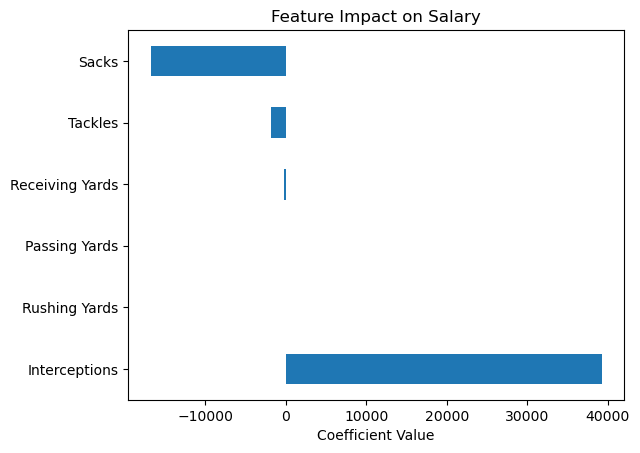

In [2]:

features = ['Passing Yards', 'Rushing Yards', 'Receiving Yards', 'Tackles', 'Sacks', 'Interceptions']
X = df[features]
y = df['Cap Hit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}, MAE: ${mae:,.0f}, RMSE: ${rmse:,.0f}")

feature_importance = pd.Series(model.coef_, index=features)
feature_importance.sort_values(ascending=False).plot(kind='barh', title="Feature Impact on Salary")
plt.xlabel("Coefficient Value")
plt.show()